In [3]:
#Step 1
#Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #for regex

In [4]:
#Step 2
# Last WebSCrapping ON 26/05/2023 TIME 3:00PM
#request the content from website
page = requests.get('https://priceoye.pk/')
page.status_code

200

In [5]:
# Step 3
#prints the html file in a better formatted string with indentation
soup = BeautifulSoup(page.content, 'html.parser') #beautifulSoup object
print(soup.prettify())

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Lowest Mobile Price In Pakistan - PriceOye
  </title>
  <link href="//cdn.ampproject.org" rel="preconnect"/>
  <link href="https://fonts.googleapis.com" rel="preconnect"/>
  <link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
  <link href="https://fonts.googleapis.com/css2?family=Open+Sans:wght@400;600&amp;display=swap" rel="stylesheet"/>
  <link href="https://cdn.jsdelivr.net/npm/swiper@9/swiper-bundle.min.css" rel="stylesheet"/>
  <link href="//cdn.ampproject.org" rel="dns-prefetch"/>
  <link href="//static.priceoye.pk" rel="preconnect"/>
  <link href="//static.priceoye.pk" rel="dns-prefetch"/>
  <link href="//images.priceoye.pk" rel="preconnect"/>
  <link href="//images.priceoye.pk" rel="dns-prefetch"/>
  <link as="image" href="https://static.priceoye.pk/images/placeholder-product-mobile.jpg" rel="preload"/>
  <link as="image" href="https://static.priceoye.pk/images/product

In [6]:
#Step 4
# First Page Data ,Class: Product List ( it contain: Only Product Name, New Price, Previous Price,Discount Price)
product_list = soup.find('div', class_='product-list')
for box in product_list:
    print(box.get_text(strip=True))


Soundpeats True Wireless Earbuds Free 2 ClassicRs. 4,899Rs. 5,899(17% OFF)M10 TWS Wireless Bluetooth EarbudsRs. 1,249Rs. 2,499(50% OFF)Dany Airdots 101Rs. 2,999Rs. 7,499(60% OFF)Samsung Galaxy Buds 2 ProRs. 32,999Rs. 39,999(18% OFF)M20 TWS Wireless Bluetooth EarbudsRs. 1,349Rs. 2,399(44% OFF)Airs Pro TWS Bluetooth EarbudsRs. 1,199Rs. 1,699(29% OFF)Soundpeats True Capsule 3 Pro EarbudsRs. 12,499Rs. 15,000(17% OFF)Samsung Galaxy Buds 2Rs. 18,999Rs. 21,999(14% OFF)Soundpeats True Wireless Earbuds Air 3 DeluxeRs. 8,999Rs. 11,499(22% OFF)Airox 300 AirPods ProRs. 3,299Rs. 3,999(18% OFF)Airox X500 Airpods ProRs. 4,199Rs. 5,500(24% OFF)Redmi Buds 3 LiteRs. 3,649Rs. 4,999(27% OFF)



In [7]:
#Step 5
#all the hyperlinks on the navigation menu
categories = soup.find('div',class_= 'sb-all-category')
# Find all the 'a' tags within the 'categories
category_links = categories.find_all('a')
category_linklist = []
for link in category_links:
    category_name = link.text
    category_url = link.get('href')
    category_linklist.append(f"{category_name}: {category_url}")

print("All Categories:")
print("\n".join(category_linklist))

All Categories:
Mobiles: https://priceoye.pk/mobiles
Apple: https://priceoye.pk/mobiles/apple
Infinix: https://priceoye.pk/mobiles/infinix
Itel: https://priceoye.pk/mobiles/itel
Nokia: https://priceoye.pk/mobiles/nokia
Oppo: https://priceoye.pk/mobiles/oppo
Realme: https://priceoye.pk/mobiles/realme
Samsung: https://priceoye.pk/mobiles/samsung
Tecno: https://priceoye.pk/mobiles/tecno
Vivo: https://priceoye.pk/mobiles/vivo
Xiaomi: https://priceoye.pk/mobiles/xiaomi
Alcatel: https://priceoye.pk/mobiles/alcatel
Asus: https://priceoye.pk/mobiles/asus
Blackberry: https://priceoye.pk/mobiles/blackberry
Calme: https://priceoye.pk/mobiles/calme
Club Mobile: https://priceoye.pk/mobiles/club-mobile
Dcode: https://priceoye.pk/mobiles/dcode
Digit: https://priceoye.pk/mobiles/digit
E-tachi: https://priceoye.pk/mobiles/e-tachi
Faywa: https://priceoye.pk/mobiles/faywa
Gfive: https://priceoye.pk/mobiles/gfive
Gionee: https://priceoye.pk/mobiles/gionee
Google: https://priceoye.pk/mobiles/google
Gresso:

In [30]:
# Step 6
# Now  we proceed towards Category Wise Data (Like Mobiles )
#Mobile #1st page Data with URL(We Entered manually)
url_mobiles = 'https://priceoye.pk/mobiles'
mobiles = requests.get(url_mobiles)
soup1 = BeautifulSoup(mobiles.content, 'html.parser')
mobile_list = soup1.find('div', class_='product-list')

#In the 'productBox b-productBox' which is in our class 'product-list'
#we find the all the information with Product Link 

for box in mobile_list.find_all('div', class_='productBox b-productBox'):
    print(box.get_text(strip=True))
    product_link_tag = box.find('a')
    if product_link_tag:
        product_link = product_link_tag['href']
        print("Product Link:", product_link)
# In the class 'image-box desktop' which is in 'productBox b-productBox'we find the Product Image link
    image_box = box.find('div', class_='image-box desktop')
    if image_box:
        product_image_tag = image_box.find('amp-img')
        if product_image_tag:
            product_image = product_image_tag.get('src')
            print("Product Image:", product_image)

    print()

Infinix Hot 12 PlayRs. 34,199Rs. 35,999(5% OFF)
Product Link: https://priceoye.pk/mobiles/infinix/infinix-hot-12-play
Product Image: https://static.priceoye.pk/images/badges/po-mega-sale.png

Infinix Hot 12iRs. 35,449Rs. 42,000(16% OFF)
Product Link: https://priceoye.pk/mobiles/infinix/infinix-hot-12i
Product Image: https://static.priceoye.pk/images/badges/po-mega-sale.png

Infinix Smart 6Rs. 29,199Rs. 30,999(6% OFF)
Product Link: https://priceoye.pk/mobiles/infinix/infinix-smart-6
Product Image: https://static.priceoye.pk/images/badges/po-mega-sale.png

Realme C25YRs. 37,299Rs. 49,999(25% OFF)
Product Link: https://priceoye.pk/mobiles/realme/realme-c25y
Product Image: https://static.priceoye.pk/images/badges/po-mega-sale.png

Nokia 105 PlusRs. 5,399Rs. 5,800(7% OFF)
Product Link: https://priceoye.pk/mobiles/nokia/nokia-105-plus
Product Image: https://images.priceoye.pk/nokia-105-plus-pakistan-priceoye-j5e36-270x270.webp

Samsung Galaxy A04Rs. 34,799Rs. 37,500(7% OFF)
Product Link: htt

In [31]:
# Step 7
# Get the URL for the desired category and subcategory which is given by user
desired_category = input("Please Enter Your desired category (Mobiles,Smart Watches etc) : ")
desired_subcategory = input("Please enter the desired subcategory (Samsung, Oppo, Infinix etc ): ")
category_url = None
subcategory_url = None
category_links = categories.find_all('a')
#it compare your given name to the text of 'sb-all-category' which was given in tag 'a' which is stored in
#category_links in step 4
for link in category_links:
    category_name = link.text.lower()
    if desired_category.lower() in category_name:
        category_url = link.get('href')
        break

# Check if the category URL was found
if category_url:
    print(f"URL for {desired_category} : {category_url}")
    subcategory_page = requests.get(category_url)
    subcategory_soup = BeautifulSoup(subcategory_page.content, 'html.parser')

    # Find the subcategory link
    subcategory_links = subcategory_soup.find_all('a')
    for subcategory_link in subcategory_links:
        subcategory_name = subcategory_link.text.lower()
        if desired_subcategory.lower() in subcategory_name:
            subcategory_url = subcategory_link.get('href')
            break

# Check if the subcategory URL was found
if subcategory_url:
    print(f"URL for {desired_subcategory} in {desired_category}: {subcategory_url}")
else:
    print(f"No URL found for {desired_subcategory} in {desired_category}.")
    
# - Charging Cables, Speakers are not in Subcategory Form in the website they are only subcategorized in 
# navigation menu (in URL they are not Sub-Categorized): like  https://priceoye.pk/mobile-cables

Please Enter Your desired category (Mobiles,Smart Watches etc) : Mobiles Accessories
Please enter the desired subcategory (Samsung, Oppo, Infinix etc ): Wireless Chargers
URL for Mobiles Accessories : https://priceoye.pk/mobiles-accessories
URL for Wireless Chargers in Mobiles Accessories: https://priceoye.pk/wireless-chargers


In [32]:
# Step 8 
# Content based on category  URL (Only the 1st page content)  
# Repeat the Code  of step 6 with "category_url"

product  = requests.get(category_url)
soup2 = BeautifulSoup(product.content, 'lxml')
anyproduct_list = soup2.find('div', class_='product-list')
for box in anyproduct_list.find_all('div', class_='productBox b-productBox'):
    print(box.get_text(strip=True))
    product_link_tag = box.find('a')
    if product_link_tag:
        product_link = product_link_tag['href']
        print("Product Link:", product_link)

    image_box = box.find('div', class_='image-box desktop')
    if image_box:
        product_image_tag = image_box.find('amp-img')
        if product_image_tag:
            product_image = product_image_tag.get('src')
            print("Product Image:", product_image)
    print()
# We can repeat the same code for subcategory URL

TAAR Nova Micro USB CableRs. 499Rs. 680(27% OFF)
Product Link: https://priceoye.pk/mobile-cables/taar/taar-nova-micro-usb-cable
Product Image: https://images.priceoye.pk/taar-nova-micro-usb-cable-pakistan-priceoye-6lbl8-270x270.webp

TAAR Charge Up Micro USB CableRs. 399Rs. 600(34% OFF)
Product Link: https://priceoye.pk/mobile-cables/taar/taar-charge-up-micro-usb-cable
Product Image: https://images.priceoye.pk/taar-charge-up-micro-usb-cable-pakistan-priceoye-6zj7k-270x270.webp

Aukey 90° Lightning Cable (CB-BAL6)Rs. 2,449Rs. 3,000(18% OFF)
Product Link: https://priceoye.pk/mobile-cables/aukey/aukey-90-lightning-cable-cb-bal6
Product Image: https://images.priceoye.pk/aukey-90-lightning-cable-cb-bal6-pakistan-priceoye-ondwt-270x270.webp

Tronsmart Lightning Cable (LTA14)Rs. 1,799Rs. 1,800(0% OFF)
Product Link: https://priceoye.pk/mobile-cables/tronsmart/tronsmart-lightning-cable-lta14
Product Image: https://images.priceoye.pk/tronsmart-lightning-cable-lta14-pakistan-priceoye-wv4t3-270x27

In [33]:
# Step 9
#All Data For further Analyzing on the multiple pages user (Category like: Mobile,Wireless Earbuds etc)
page_number = 1
next_page = True
total_products = 0
products = []
# URL format on the bases of page no,again request Content
while next_page:
    page_url2 = f"{category_url}?page={page_number}"
    response = requests.get(page_url2)
    soup = BeautifulSoup(response.content, 'html.parser')
    anyproduct_list1 = soup.find('div', class_='product-list')
    for box in anyproduct_list1.find_all('div', class_='productBox b-productBox'):
        product_text = box.get_text(strip=True)
#in the end we want comma separated file so now we split so we get product name price etc in comma separatd
#split on the bases of Rs 
        parts = product_text.split('Rs.')
    
# some items  are'DISCONTINUED'and 'COMING SOON'some are coming sonn but it show on pages,we assign  available  = True if they
# are not written but if in the name part it shows discounted or comingsoon the we switch to  available = Flase

        available = True
        name = parts[0].replace('DISCONTINUED', '').replace('COMING SOON', '').strip()
#remove commas
        new_price = parts[1].replace(',','').strip()
        previous_price = ""
        discount_percentage = ""
 # In some there is previous price where discount available in some it is not
        if len(parts) > 2 and parts[2] in product_text:
            previous = parts[2].split('(')
            previous_price = previous[0].replace(',','').strip()
            discount_percentage = previous[1].replace(')', '').replace('OFF', '').strip()

        if "DISCONTINUED" in product_text or "COMING SOON" in product_text:
             available = False

        product_link_tag = box.find('a')
        if product_link_tag:
            product_link = product_link_tag['href']
            image_box = box.find('div', class_='image-box desktop')
            if image_box:
                product_image_tag = image_box.find('amp-img')
                if product_image_tag:
                    product_image = product_image_tag.get('src')
        if name:
                brand = name.split()[0]  # Extract the brand name from the product name

        extracted_product = [
                brand,
                name,
                new_price,
                previous_price,
                discount_percentage,
                available,
                product_link,
                product_image
            ]

        products.append(extracted_product)
        total_products += 1

    for product in products:
        print(product)

# Check if there is a next page available
#the rel attribute is sed in pagination systemswhich indicate the relationship between the current page and the next page
    next_page_button = soup.find('a', rel='next')
    if next_page_button:
        page_number += 1
    else:
        next_page = False

print("Total products:", total_products)

['TAAR', 'TAAR Nova Micro USB Cable', '499', '680', '27%', True, 'https://priceoye.pk/mobile-cables/taar/taar-nova-micro-usb-cable', 'https://images.priceoye.pk/taar-nova-micro-usb-cable-pakistan-priceoye-6lbl8-270x270.webp']
['TAAR', 'TAAR Charge Up Micro USB Cable', '399', '600', '34%', True, 'https://priceoye.pk/mobile-cables/taar/taar-charge-up-micro-usb-cable', 'https://images.priceoye.pk/taar-charge-up-micro-usb-cable-pakistan-priceoye-6zj7k-270x270.webp']
['Aukey', 'Aukey 90° Lightning Cable (CB-BAL6)', '2449', '3000', '18%', True, 'https://priceoye.pk/mobile-cables/aukey/aukey-90-lightning-cable-cb-bal6', 'https://images.priceoye.pk/aukey-90-lightning-cable-cb-bal6-pakistan-priceoye-ondwt-270x270.webp']
['Tronsmart', 'Tronsmart Lightning Cable (LTA14)', '1799', '1800', '0%', True, 'https://priceoye.pk/mobile-cables/tronsmart/tronsmart-lightning-cable-lta14', 'https://images.priceoye.pk/tronsmart-lightning-cable-lta14-pakistan-priceoye-wv4t3-270x270.webp']
['TAAR', 'TAAR NovaTYP

In [34]:
# Step 10
# Open the file 'Price_Oye Unmodified.txt' in write mode if it is not created it creates the file.
with open('Price_Oye CategoryWise Unmodified.txt', 'w') as file:
            for product in products:
#write() method of the file object expects a string as its argument that's why we convert in to string
                file.write(str(product) + '\n')
            print("File is created")
df= pd.read_csv('Price_Oye CategoryWise Unmodified.txt',encoding='latin1',names=["Brand","Product Name", "New Price", "Previous Price",
                                           "Discount Percentage", "Availability", "Product URL", "Product Image Link"])
df.info()
df.describe()

File is created
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                10 non-null     object
 1   Product Name         10 non-null     object
 2   New Price            10 non-null     object
 3   Previous Price       10 non-null     object
 4   Discount Percentage  10 non-null     object
 5   Availability         10 non-null     object
 6   Product URL          10 non-null     object
 7   Product Image Link   10 non-null     object
dtypes: object(8)
memory usage: 768.0+ bytes


,Brand,Product Name,New Price,Previous Price,Discount Percentage,Availability,Product URL,Product Image Link
count,10,10,10,10,10,10,10,10
unique,4,10,7,9,9,1,10,10
top,['LOGIN','TAAR Nova Micro USB Cable','499','849','47%',True,'https://priceoye.pk/mobile-cables/taar/taar-...,'https://images.priceoye.pk/taar-nova-micro-u...
freq,5,1,2,2,2,10,1,1


In [35]:
# Step 11
#The default value of regex for Series.str.replace() will change from True to False 
#in a future release. In addition, single character regular
#expressions will not be treated as literal strings when regex=True is set

df['Brand'] = df['Brand'].str.replace('[', '',regex = False).str.replace("'", '',regex = False)
df['Product Name'] = df['Product Name'].str.replace("'", "").str.strip()
df['Product URL'] = df['Product URL'].str.replace("'", '',regex = False)
df['Product Image Link'] = df['Product Image Link'].str.replace(']', '',regex = False).str.replace("'", '',regex = False)
# New price Conversion
df['New Price'] = df['New Price'].astype(str)
df['New Price'] = df['New Price'].str.replace(",", "").str.replace("'", "")
df['New Price'] = df['New Price'].astype(float)

#Previous Price Conversion
df['Previous Price'] = df['Previous Price'].astype(str)
df['Previous Price'] = df['Previous Price'].str.replace(",", "").str.replace("'", "")
df['Previous Price'] = pd.to_numeric(df['Previous Price'], errors='coerce')


#Discount percentage conversion
df['Discount Percentage'] = df['Discount Percentage'].astype(str)
df['Discount Percentage'] = df['Discount Percentage'].str.replace("%", "").str.replace("'", "")
df['Discount Percentage'] = pd.to_numeric(df['Discount Percentage'], errors='coerce')
df['Discount'] = (df['Discount Percentage'] * df['Previous Price']) / 100
# at 5th position
df.insert(5, 'Discount', df.pop('Discount'))
# ALL necessary Conversion ,Cleaning is done in this CSV
df.to_csv('Price_Oye Category Wise.csv')
display(df.describe())
df

,New Price,Previous Price,Discount Percentage,Discount
count,10.000000,10.000000,10.000000,10.000000
mean,844.000000,1154.500000,31.600000,308.827000
std,700.178549,733.341098,14.930952,161.032088
min,399.000000,600.000000,0.000000,0.000000
25%,461.500000,752.250000,24.750000,188.700000
50%,524.000000,874.000000,33.500000,395.615000
75%,736.500000,1136.500000,43.500000,398.917500
max,2449.000000,3000.000000,47.000000,540.000000


,Brand,Product Name,New Price,Previous Price,Discount Percentage,Discount,Availability,Product URL,Product Image Link
0,TAAR,TAAR Nova Micro USB Cable,499.0,680,27,183.60,True,https://priceoye.pk/mobile-cables/taar/taar-n...,https://images.priceoye.pk/taar-nova-micro-us...
1,TAAR,TAAR Charge Up Micro USB Cable,399.0,600,34,204.00,True,https://priceoye.pk/mobile-cables/taar/taar-c...,https://images.priceoye.pk/taar-charge-up-mic...
2,Aukey,Aukey 90° Lightning Cable (CB-BAL6),2449.0,3000,18,540.00,True,https://priceoye.pk/mobile-cables/aukey/aukey...,https://images.priceoye.pk/aukey-90-lightning...
3,Tronsmart,Tronsmart Lightning Cable (LTA14),1799.0,1800,0,0.00,True,https://priceoye.pk/mobile-cables/tronsmart/t...,https://images.priceoye.pk/tronsmart-lightnin...
4,TAAR,TAAR NovaTYPE-C Cable,549.0,720,24,172.80,True,https://priceoye.pk/mobile-cables/taar/taar-n...,https://images.priceoye.pk/taar-novatype-c-ca...
5,LOGIN,LOGIN IOS 40w Support Data Cable With Led Indi...,799.0,1199,33,395.67,True,https://priceoye.pk/mobile-cables/login/login...,https://images.priceoye.pk/login-ios-40w-supp...
6,LOGIN,LOGIN Micro 2.4A TPE Wire (LT-D121),449.0,849,47,399.03,True,https://priceoye.pk/mobile-cables/login/login...,https://images.priceoye.pk/login-micro-2-4a-t...
7,LOGIN,LOGIN Micro 2.4A Metal Data Cable (LT-D3),449.0,849,47,399.03,True,https://priceoye.pk/mobile-cables/login/login...,https://images.priceoye.pk/login-micro-2-4a-m...
8,LOGIN,LOGIN Micro 3.1A Data Cable (LT-DC10),549.0,949,42,398.58,True,https://priceoye.pk/mobile-cables/login/login...,https://images.priceoye.pk/login-micro-3-1a-d...
9,LOGIN,LOGIN Micro 2.1A Data Cable (LT-D2),499.0,899,44,395.56,True,https://priceoye.pk/mobile-cables/login/login...,https://images.priceoye.pk/login-micro-2-1a-d...


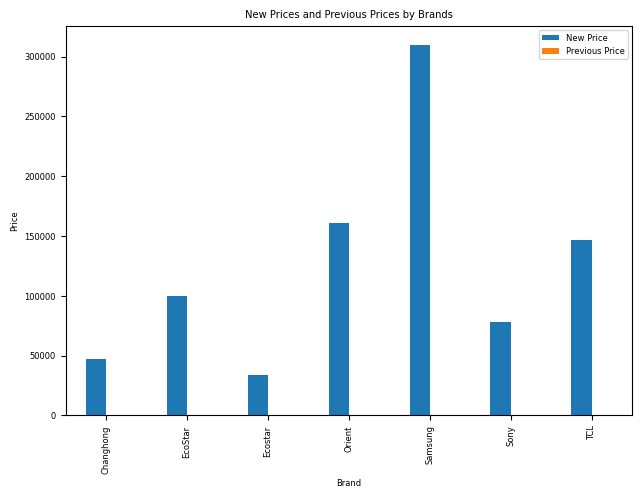

In [17]:
#Step 12 Visulization Category Wise
# calculates the average new price for each brand in the DataFrame 
#df and stores the results in the brand_price_comp DataFrame
plt.Figure(figsize= (10,6))
plt.rcParams.update({'font.size': 6})
brand_price_comp = df.groupby('Brand')[['New Price', 'Previous Price']].mean().reset_index()
brand_price_comp.plot(x='Brand', y=['New Price', 'Previous Price'], kind='bar', rot=90)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.tight_layout() 
plt.title('New Prices and Previous Prices by Brands')
plt.show()

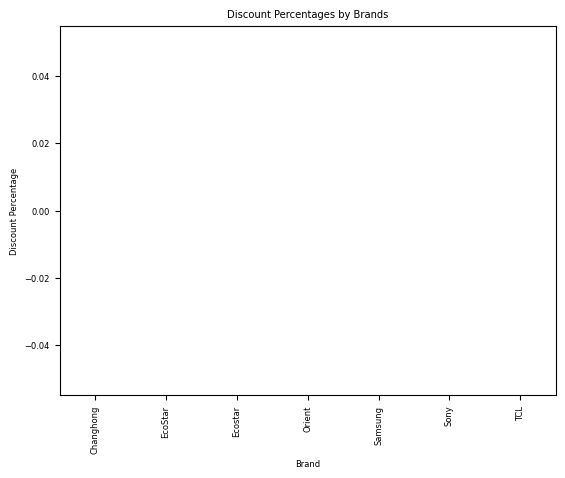

In [18]:
# Step 13
brand_disc_comp = df.groupby('Brand')['Discount Percentage'].mean().reset_index()
sns.barplot(data=brand_disc_comp, x='Brand', y='Discount Percentage')
plt.xlabel('Brand')
plt.ylabel('Discount Percentage')
plt.title('Discount Percentages by Brands')
plt.xticks(rotation=90)
plt.show()

Enter the minimum price: 50000
Enter the maximum price: 60000


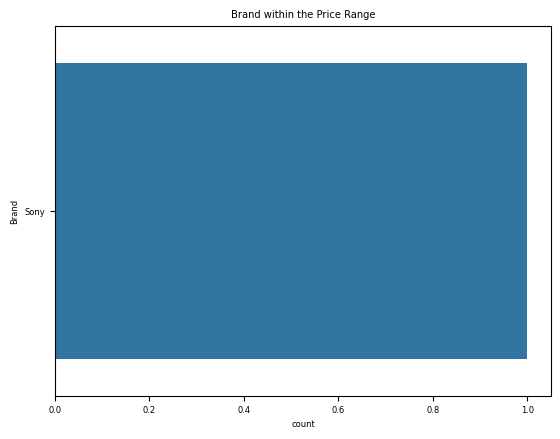

In [19]:
# Step 14
plt.Figure(figsize= (60,60))
# font size
plt.rcParams.update({'font.size': 6})

# let the user Choice its range
min_price = float(input("Enter the minimum price: "))
max_price = float(input("Enter the maximum price: "))

selected_rows = (df['New Price'] >= min_price) & (df['New Price']<=max_price)
selected_data = df.loc[selected_rows, :]

#display(selected_data)
sns.countplot(data=df[selected_rows], y='Brand')
plt.ylabel('Brand')
plt.title('Brand within the Price Range')

# Show the plot
plt.show()

In [20]:
#Step 15
selected_brand = input("Enter the brand to see the models within the price range: ")
selected_rows1 = (df['Brand'] == selected_brand) & (df['New Price'] >= min_price) & (df['New Price'] <= max_price)
selected_data = df.loc[selected_rows1, :]
for index, row in selected_data.iterrows():
    print("Model: {}, Price: {}".format(row['Product Name'], row['New Price']))

Enter the brand to see the models within the price range: Sony
Model: Sony 40 Inch FHD Smart LED TV (40W650D), Price: 55499.0


In [36]:
# Step 16  # some analysis basis on subcategory URL  
# same Code as in Step (9) but with Subcategory URL
page_number = 1
next_page = True
total_products = 0
products2 = []
# URL format on the bases of page no,again request Content
while next_page:
    page_url = f"{subcategory_url}?page={page_number}"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    anyproduct_list1 = soup.find('div', class_='product-list')
    for box in anyproduct_list1.find_all('div', class_='productBox b-productBox'):
        product_text = box.get_text(strip=True)
#in the end we want comma separated file so now we split so we get product name price etc in comma separatd
#split on the bases of Rs 
        parts = product_text.split('Rs.')
        available = True
        name = parts[0].replace('DISCONTINUED', '').replace('COMING SOON', '').strip()
#remove commas
        new_price = parts[1].replace(',','').strip()
        previous_price = ""
        discount_percentage = ""
 # In some there is previous price where discount available in some it is not
        if len(parts) > 2 and parts[2] in product_text:
            previous = parts[2].split('(')
            previous_price = previous[0].replace(',','').strip()
            discount_percentage = previous[1].replace(')', '').replace('OFF', '').strip()

        if "DISCONTINUED" in product_text or "COMING SOON" in product_text:
             available  = False

        product_link_tag = box.find('a')
        if product_link_tag:
            product_link = product_link_tag['href']
            image_box = box.find('div', class_='image-box desktop')
            if image_box:
                product_image_tag = image_box.find('amp-img')
                if product_image_tag:
                    product_image = product_image_tag.get('src')

        extracted_product = [
                name,
                new_price,
                previous_price,
                discount_percentage,
                available,
                product_link,
                product_image
            ]

        products2.append(extracted_product)
        total_products += 1

    for product2 in products2:
        print(product2)

# Check if there is a next page available
#the rel attribute is sed in pagination systemswhich indicate the relationship between the current page and the next page
    next_page_button = soup.find('a', rel='next')
    if next_page_button:
        page_number += 1
    else:
        next_page = False

print("Total products:", total_products)

['Joyroom 15W Ultra-Thin Fast Magnetic Wireless Charger (JR-A28)', '2849', '3299', '14%', True, 'https://priceoye.pk/wireless-chargers/joyroom/joyroom-15w-ultra-thin-fast-magnetic-wireless-charger-jr-a28', 'https://images.priceoye.pk/joyroom-15w-ultra-thin-fast-magnetic-wireless-charger-jr-a28-pakistan-priceoye-ahgje-270x270.webp']
['Joyroom Iwatch Magnetic Wireless Charger (S-IW003S)', '1799', '2149', '16%', True, 'https://priceoye.pk/wireless-chargers/joyroom/joyroom-iwatch-magnetic-wireless-charger-s-iw003s', 'https://images.priceoye.pk/joyroom-iwatch-magnetic-wireless-charger-s-iw003s-pakistan-priceoye-u4ryd-270x270.webp']
['Joyroom Iwatch Magnetic Wireless Charger (S-IW001S)', '1949', '2299', '15%', True, 'https://priceoye.pk/wireless-chargers/joyroom/joyroom-iwatch-magnetic-wireless-charger-s-iw001s', 'https://images.priceoye.pk/joyroom-i-watch-magnetic-charger-s-iw001s-pakistan-priceoye-9l2w6-270x270.webp']
['Joyroom Iwatch Magnetic Wireless Charger (S-IW002S)', '2449', '2849', 

In [37]:
# Step 17
# Open the file 'Price_Oye Unmodified.txt' in write mode if it is not created it creates the file.
with open('Price_Oye Sub_Category Wise Unmodified.txt', 'w') as file:
            for product2 in products2:
#write() method of the file object expects a string as its argument that's why we convert in to string
                file.write(str(product2) + '\n')
            print("File is created")
df2= pd.read_csv('Price_Oye Sub_Category Wise Unmodified.txt',encoding='latin1',names=["Product Name", "New Price", "Previous Price",
                                           "Discount Percentage", "Availability", "Product URL", "Product Image Link"])
df2.info()
df2.describe()

File is created
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product Name         25 non-null     object
 1   New Price            25 non-null     object
 2   Previous Price       25 non-null     object
 3   Discount Percentage  25 non-null     object
 4   Availability         25 non-null     object
 5   Product URL          25 non-null     object
 6   Product Image Link   25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


,Product Name,New Price,Previous Price,Discount Percentage,Availability,Product URL,Product Image Link
count,25,25,25,25,25,25,25
unique,25,22,6,5,1,25,25
top,['Joyroom 15W Ultra-Thin Fast Magnetic Wireles...,'3599','','',True,'https://priceoye.pk/wireless-chargers/joyroo...,'https://images.priceoye.pk/joyroom-15w-ultra...
freq,1,2,20,20,25,1,1


In [38]:
# Step 18
#The default value of regex for Series.str.replace() will change from True to False 
#in a future release. In addition, single character regular
#expressions will not be treated as literal strings when regex=True is set

df2['Product Name'] = df2['Product Name'].str.replace('[', '',regex = False).str.replace("'", '',regex = False)
df2['Product URL'] = df2['Product URL'].str.replace("'", '',regex = False)
df2['Product Image Link'] = df2['Product Image Link'].str.replace(']', '',regex = False).str.replace("'", '',regex = False)

# New price Conversion
df2['New Price'] = df2['New Price'].astype(str)
df2['New Price'] = df2['New Price'].str.replace(",", "").str.replace("'", "")
df2['New Price'] = df2['New Price'].astype(float)

#Previous Price Conversion
df2['Previous Price'] = df2['Previous Price'].astype(str)
df2['Previous Price'] = df2['Previous Price'].str.replace(",", "").str.replace("'", "")
df2['Previous Price'] = pd.to_numeric(df2['Previous Price'], errors='coerce')


#Discount percentage conversion
df2['Discount Percentage'] = df2['Discount Percentage'].astype(str)
df2['Discount Percentage'] = df2['Discount Percentage'].str.replace("%", "").str.replace("'", "")
df2['Discount Percentage'] = pd.to_numeric(df2['Discount Percentage'], errors='coerce')
df2['Discount'] = (df2['Discount Percentage'] * df2['Previous Price']) / 100
# at 4th position
df2.insert(4, 'Discount', df2.pop('Discount'))
# ALL necessary Conversion ,Cleaning is done in this CSV
df2.to_csv('Price_Oye Sub-Category Wise.csv')
display(df2.describe())
df2

,New Price,Previous Price,Discount Percentage,Discount
count,25.000000,5.000000,5.000000,5.000000
mean,3608.120000,2919.000000,16.400000,493.836000
std,1810.849233,757.132749,3.781534,242.980609
min,999.000000,2149.000000,14.000000,343.840000
25%,2449.000000,2299.000000,14.000000,344.850000
50%,3099.000000,2849.000000,15.000000,398.860000
75%,4299.000000,3299.000000,16.000000,461.860000
max,8399.000000,3999.000000,23.000000,919.770000


,Product Name,New Price,Previous Price,Discount Percentage,Discount,Availability,Product URL,Product Image Link
0,Joyroom 15W Ultra-Thin Fast Magnetic Wireless ...,2849.0,3299.0,14.0,461.86,True,https://priceoye.pk/wireless-chargers/joyroom...,https://images.priceoye.pk/joyroom-15w-ultra-...
1,Joyroom Iwatch Magnetic Wireless Charger (S-IW...,1799.0,2149.0,16.0,343.84,True,https://priceoye.pk/wireless-chargers/joyroom...,https://images.priceoye.pk/joyroom-iwatch-mag...
2,Joyroom Iwatch Magnetic Wireless Charger (S-IW...,1949.0,2299.0,15.0,344.85,True,https://priceoye.pk/wireless-chargers/joyroom...,https://images.priceoye.pk/joyroom-i-watch-ma...
3,Joyroom Iwatch Magnetic Wireless Charger (S-IW...,2449.0,2849.0,14.0,398.86,True,https://priceoye.pk/wireless-chargers/joyroom...,https://images.priceoye.pk/joyroom-iwatch-mag...
4,Joyroom 15W Square Wireless Charger (JR-A23),3099.0,3999.0,23.0,919.77,True,https://priceoye.pk/wireless-chargers/joyroom...,https://images.priceoye.pk/joyroom-15w-square...
5,Samsung Wireless Charger Pad (P1300),4499.0,NaN,NaN,NaN,True,https://priceoye.pk/wireless-chargers/samsung...,https://images.priceoye.pk/wireless-charger-p...
6,Baseus Simple 2in1 Wireless Charger (18W),3599.0,NaN,NaN,NaN,True,https://priceoye.pk/wireless-chargers/baseus/...,https://images.priceoye.pk/baseus-simple-2-in...
7,Baseus UFO Desktop Wireless Charger,2099.0,NaN,NaN,NaN,True,https://priceoye.pk/wireless-chargers/baseus/...,https://images.priceoye.pk/baseus-ufo-desktop...
8,MI Wireless Charging Stand (20W),2999.0,NaN,NaN,NaN,True,https://priceoye.pk/wireless-chargers/xiaomi/...,https://images.priceoye.pk/mi-wireless-chargi...
9,Baseus Planet 2 in 1 Wireless Charger (10W),3599.0,NaN,NaN,NaN,True,https://priceoye.pk/wireless-chargers/baseus/...,https://images.priceoye.pk/baseus-simple-magn...


In [ ]:
#Step 19
colors = ['pink', 'yellow']
values = df2['Availability'].value_counts()
# Plot the pie chart
values.plot.pie(autopct='%1.1f%%', colors=colors)

In [ ]:
#Step 20
df2['Availability'] = df2['Availability'].astype(bool)
selected_rows = (df2['Availability'] == True)
selected_data = df2.loc[selected_rows, :]
#  scatter plot with a regression line
sns.regplot(data=selected_data, x='Previous Price', y='Discount Percentage')
plt.xlabel('Previous Price')
plt.ylabel('Discount Percentage')
plt.title('Discount Percentage by Previous Price')
plt.xticks(rotation=90)

plt.show()